## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 12 independent variables :

* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `Cut quality`: The way that a diamond's facets are cut and arranged, which affects its brilliance and fire
* `Symmetry`: The degree to which a diamond's facets are evenly arranged, which affects its overall appearance.
* `Polish`: The smoothness of a diamond's surface, which affects its sparkle.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `Meas_length`: The length of a diamond, measured in millimeters.
* `Meas_width`: The width of a diamond, measured in millimeters.
* `Meas_depth`: The depth of a diamond, measured in millimeters.


Target variable:
* `price`: Price of the given Diamond.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diamond.csv")

In [3]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,200


In [4]:
df.isna().sum()

cut              0
color            0
clarity          0
carat_weight     0
cut_quality      0
symmetry         0
polish           0
depth_percent    0
table_percent    0
meas_length      0
meas_width       0
meas_depth       0
price            0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215531 entries, 0 to 219702
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cut            215531 non-null  object 
 1   color          215531 non-null  object 
 2   clarity        215531 non-null  object 
 3   carat_weight   215531 non-null  float64
 4   cut_quality    215531 non-null  object 
 5   symmetry       215531 non-null  object 
 6   polish         215531 non-null  object 
 7   depth_percent  215531 non-null  float64
 8   table_percent  215531 non-null  float64
 9   meas_length    215531 non-null  float64
 10  meas_width     215531 non-null  float64
 11  meas_depth     215531 non-null  float64
 12  price          215531 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 23.0+ MB


In [8]:
df.nunique()

cut                 11
color               11
clarity             11
carat_weight       878
cut_quality          6
symmetry             5
polish               5
depth_percent      534
table_percent      235
meas_length       1415
meas_width        1155
meas_depth         852
price            22202
dtype: int64

In [9]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,price
count,215531.000000,215531.000000,215531.000000,215531.000000,215531.000000,215531.000000,2.155310e+05
mean,0.757084,61.733959,57.983606,5.560928,5.141238,3.290719,6.935283e+03
std,0.843938,9.787744,9.297366,1.761124,1.367381,2.069537,2.603966e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.070000,4.800000,3.040000,1.980000e+03
75%,1.000000,63.500000,60.000000,6.360000,5.700000,3.650000,5.276000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'price']

We have 6 categorical features : ['cut', 'color', 'clarity', 'cut_quality', 'symmetry', 'polish']


In [11]:
for i in categorical_features:
    print(f"Categories in '{i}' variable:",end=" " )
    print(df[i].unique())

Categories in 'cut' variable: ['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher']
Categories in 'color' variable: ['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown']
Categories in 'clarity' variable: ['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3']
Categories in 'cut_quality' variable: ['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal']
Categories in 'symmetry' variable: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']
Categories in 'polish' variable: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']


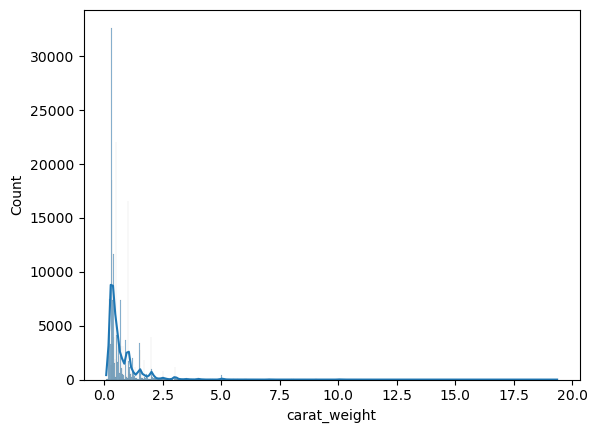

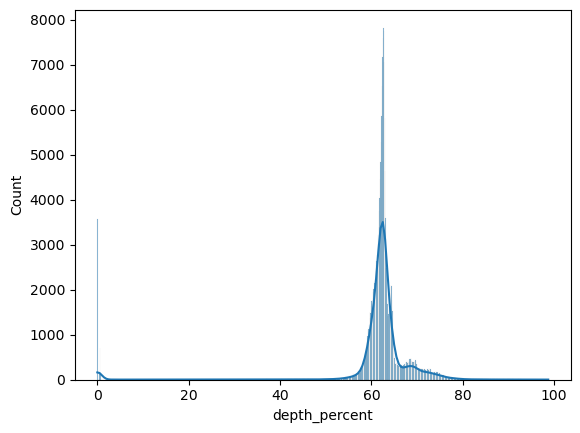

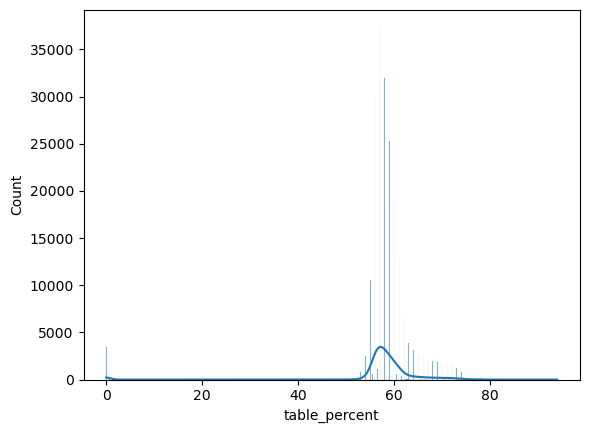

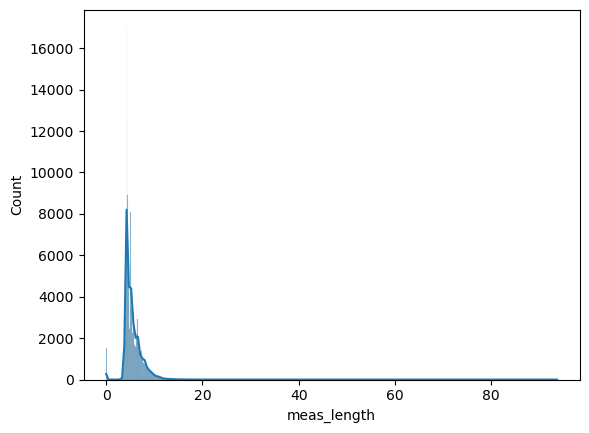

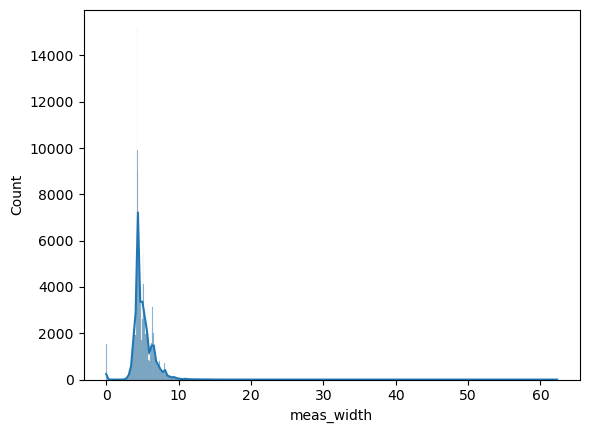

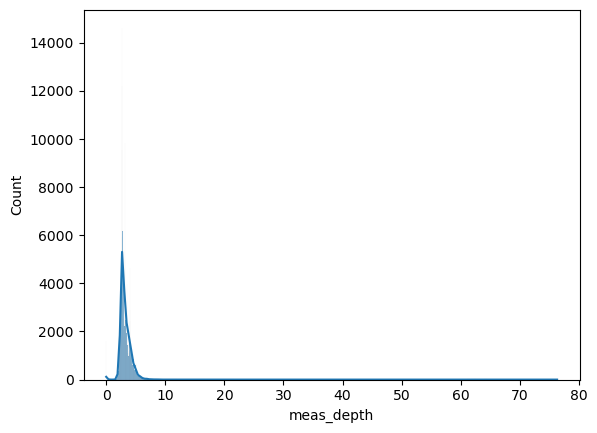

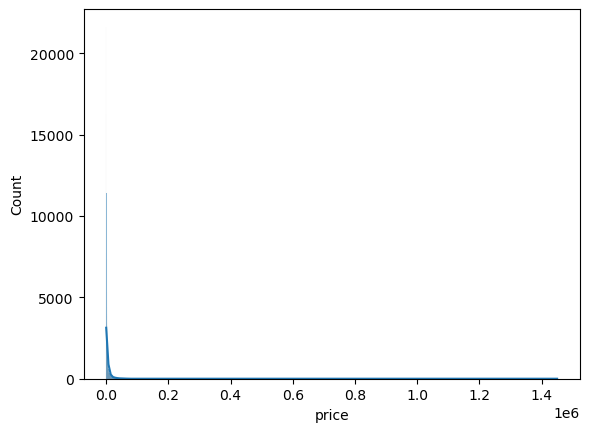

In [12]:
num_features = df.select_dtypes(exclude="object").columns
for i in num_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()